<a href="https://colab.research.google.com/github/hiteshmishra052/Car_Price_Prediction/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Car Price Prediction Model**

In [141]:
import numpy as np
import pandas as pd
df= pd.read_csv('/content/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [142]:
df.shape

(6019, 14)

In [143]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [144]:
df1 = df.drop('New_Price', axis = 'columns')
df1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [145]:
k = '18.2 kmpl'
print(k.split(' '))
float(k.split(' ')[0])

['18.2', 'kmpl']


18.2

In [146]:
def fix_units(x):
  try:
    return float(x.split(' ')[0])
  except:
    return x

In [147]:
a = '17.8 kmpl'
print(fix_units(a))

17.8


In [148]:
df1['Mileage'] = df1['Mileage'].apply(fix_units)
df1['Engine'] = df1['Engine'].apply(fix_units)
df1['Power'] = df1['Power'].apply(fix_units)

In [149]:
df1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [150]:
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [151]:
df[df['Power'].apply(lambda x: type(x) != float)]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [152]:
df1[df1['Power'].apply(lambda x: type(x) != float)]['Power'].unique()

array(['null bhp'], dtype=object)

In [153]:
df1['Power'] = df1['Power'].apply(lambda x: x if type(x)==float else np.nan)

In [154]:
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [155]:
df1.isnull().sum()

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [156]:
df1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [157]:
df1['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [158]:
#dropped the CNG, LPG and electric cars because of lesser sample size

df2 = df1[df1['Fuel_Type'].isin(['Diesel','Petrol'])]
df2.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [159]:
df2['Transmission'].value_counts()

Manual       4233
Automatic    1718
Name: Transmission, dtype: int64

In [160]:
df2['Owner_Type'].value_counts()

First             4874
Second             956
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [161]:
df2['Owner_Type'] = df2['Owner_Type'].apply(lambda x: 'First' if x == 'First' else 'Second and above')

<ipython-input-161-1d947169c795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Owner_Type'] = df2['Owner_Type'].apply(lambda x: 'First' if x == 'First' else 'Second and above')


In [162]:
df2['Owner_Type'].value_counts()

First               4874
Second and above    1077
Name: Owner_Type, dtype: int64

In [163]:
df2.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [164]:
df2['Location'].value_counts()

Mumbai        771
Hyderabad     733
Kochi         643
Coimbatore    636
Pune          608
Delhi         544
Kolkata       535
Chennai       491
Jaipur        411
Bangalore     358
Ahmedabad     221
Name: Location, dtype: int64

In [165]:
df2['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Audi A4 2.0 TFSI                  1
Volvo S60 D4 SUMMUM               1
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1847, dtype: int64

In [166]:
len(df2['Name'].unique())

1847

In [167]:
df2['Name'] = df2['Name'].str.lower()

df2['Name'] = df2['Name'].str.strip()

<ipython-input-167-6366b5e699e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name'] = df2['Name'].str.lower()
<ipython-input-167-6366b5e699e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name'] = df2['Name'].str.strip()


In [168]:
len(df2['Name'].unique())

1823

In [169]:
df2['Name'].value_counts()

maruti swift dzire vdi                50
mahindra xuv500 w8 2wd                49
maruti swift vdi                      45
honda city 1.5 s mt                   34
maruti swift vdi bsiv                 31
                                      ..
volkswagen vento 1.5 tdi trendline     1
mercedes-benz e-class e 350 d          1
maruti swift 1.3 vxi abs               1
skoda fabia 1.2 mpi ambition plus      1
mahindra xylo d4 bsiv                  1
Name: Name, Length: 1823, dtype: int64

In [170]:
car = 'maruti swift dzire vdi'
print(car.split(' ')[:2])
print(' '.join(car.split(' ')[:2]))

['maruti', 'swift']
maruti swift


In [171]:
df2['Name'] = df2['Name'].apply(lambda x:' '.join(x.split(' ')[:2]) )

<ipython-input-171-09d3e911f990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name'] = df2['Name'].apply(lambda x:' '.join(x.split(' ')[:2]) )


In [172]:
len(df2['Name'].unique())

213

In [173]:
car_count = df2['Name'].value_counts()
car_count

maruti swift         353
honda city           270
hyundai i20          247
hyundai verna        170
toyota innova        164
                    ... 
volkswagen beetle      1
fiat petra             1
volkswagen tiguan      1
mini countryman        1
jaguar f               1
Name: Name, Length: 213, dtype: int64

In [174]:
#if a type of car having sample size lesser then 30 => We will remove such car samples
#As lesser sample will generate lesser information for a machine learning model to be trained

In [175]:
car_count_more_than_30 = car_count[car_count >30]
car_count_more_than_30

maruti swift             353
honda city               270
hyundai i20              247
hyundai verna            170
toyota innova            164
hyundai i10              155
hyundai grand            152
volkswagen polo          151
maruti alto              134
maruti wagon             126
mahindra xuv500          113
volkswagen vento         107
honda amaze              106
ford figo                101
toyota fortuner          101
bmw 3                     98
ford ecosport             95
mercedes-benz new         94
hyundai creta             93
mercedes-benz e-class     88
renault duster            83
audi a4                   78
hyundai santro            74
maruti ciaz               71
maruti ertiga             71
bmw 5                     68
toyota corolla            67
maruti ritz               64
maruti baleno             63
mahindra scorpio          61
toyota etios              61
land rover                60
honda brio                60
hyundai eon               60
honda jazz    

In [176]:
df3 = df2[df2['Name'].apply(lambda x : x in car_count_more_than_30)]
df3.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [177]:
len(df3['Name'].unique())

52

In [178]:
df3.isnull().sum()

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                32
Power                116
Seats                 35
Price                  0
dtype: int64

In [179]:
#check for 0 values

(df3 == 0).sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              49
Engine                0
Power                 0
Seats                 1
Price                 0
dtype: int64

In [180]:
#Coverting all zeros into null values

df3 = df3.applymap(lambda x : np.nan if x == 0 else x)

In [181]:
df3.isnull().sum()

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               49
Engine                32
Power                116
Seats                 36
Price                  0
dtype: int64

In [182]:
df3.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [183]:
print(df3[['Mileage','Engine','Power']].mean())
print(df3[['Mileage','Engine','Power']].median())

Mileage      18.718244
Engine     1556.333696
Power       107.549288
dtype: float64
Mileage      18.74
Engine     1399.00
Power        89.84
dtype: float64


In [184]:
#Calculate engine mean and median using fuel type

df3.groupby('Fuel_Type')['Engine'].agg(['mean','median'])

,mean,median
Fuel_Type,,
Diesel,1796.109583,1582.0
Petrol,1293.685532,1197.0


In [185]:
df3['Fuel_Type'].value_counts()

Diesel    2407
Petrol    2216
Name: Fuel_Type, dtype: int64

In [186]:
df3.groupby('Transmission')['Engine'].agg(['mean','median'])

,mean,median
Transmission,,
Automatic,1972.126188,1968.0
Manual,1416.242865,1248.0


In [187]:
df3['Transmission'].value_counts()

Manual       3459
Automatic    1164
Name: Transmission, dtype: int64

In [188]:
df3.groupby('Owner_Type')['Engine'].agg(['mean','median'])

,mean,median
Owner_Type,,
First,1543.204028,1399.0
Second and above,1621.691406,1497.0


In [189]:
df3['Owner_Type'].value_counts()

First               3841
Second and above     782
Name: Owner_Type, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Engine'>

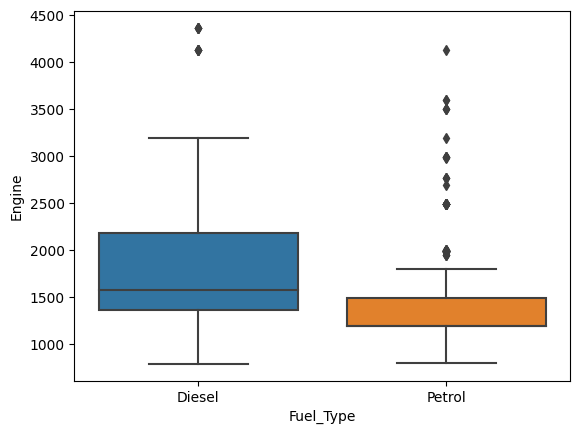

In [190]:
import seaborn as sns
sns.boxplot(x = 'Fuel_Type', y = 'Engine', data = df3)

**Remove the data Samples with outliers value in Engene**
* We will use Fuel Type (Diesel & Petrol) information to remove outliers from engine values
* Because sample distribution for diesel and petrol cars are close
* It will create a balance data disribution

In [191]:
df3.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


* Seperate Data in two parts using filtering
* Part 1 - dfd => all disel cars
* Part 2 = dfp => all petrol cars

In [192]:
dfd = df3[df3['Fuel_Type'] == 'Diesel']
dfp = df3[df3['Fuel_Type'] == 'Petrol']

In [193]:
dfd.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


In [194]:
dfd['Engine'].describe()

count    2400.000000
mean     1796.109583
std       575.627987
min       793.000000
25%      1364.000000
50%      1582.000000
75%      2179.000000
max      4367.000000
Name: Engine, dtype: float64

In [195]:
q1 = dfd['Engine'].describe()[4]
q3 = dfd['Engine'].describe()[6]
print(q1,q3)

iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr


1364.0 2179.0


In [196]:
#for diesel cars if engine value is lesser then 141.5 and higher then 3401.5 it will be an outlier
#View outliers samples

dfd[(dfd['Engine'] < 141.5) | (dfd['Engine'] > 3401.5)]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
459,459,audi q7,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.91
586,586,audi q7,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,29.77
1038,1038,land rover,Bangalore,2011,55000,Diesel,Automatic,First,10.20,4367.0,308.0,7.0,67.00
1093,1093,audi q7,Bangalore,2014,50000,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,51.00
1352,1352,land rover,Bangalore,2012,66538,Diesel,Automatic,First,10.20,4367.0,308.0,7.0,70.00
3242,3242,land rover,Bangalore,2012,63000,Diesel,Automatic,Second and above,11.49,4367.0,335.3,5.0,65.00
4388,4388,audi q7,Bangalore,2015,50000,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.00
4559,4559,audi q7,Delhi,2010,73000,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,17.51
4869,4869,land rover,Coimbatore,2012,84384,Diesel,Automatic,First,10.20,4367.0,308.0,7.0,52.54
4938,4938,audi q7,Coimbatore,2015,56238,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,51.69


In [197]:
dfd = dfd[~((dfd['Engine'] < 141.5) | (dfd['Engine'] > 3401.5))]
dfd.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


In [198]:
dfd.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               9
Engine                7
Power                44
Seats                 9
Price                 0
dtype: int64

In [199]:
#fill the missing Engine values with average value of engine for diesel cars
dfd['Engine'] = dfd['Engine'].fillna(dfd['Engine'].mean())

<ipython-input-199-ac34283e1670>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['Engine'] = dfd['Engine'].fillna(dfd['Engine'].mean())


<Axes: ylabel='Engine'>

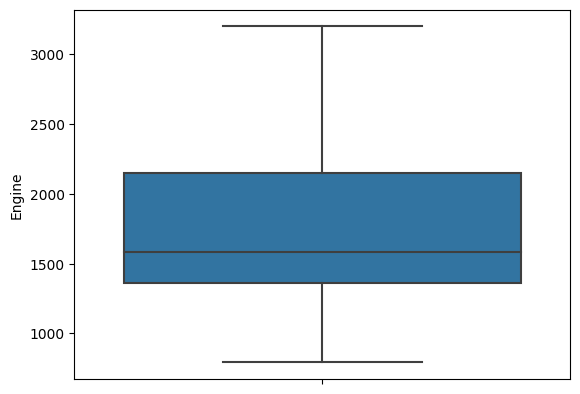

In [200]:
sns.boxplot(y = 'Engine', data = dfd)

* Remove outliers for petrol cars

In [201]:
dfp.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
10,10,maruti ciaz,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
11,11,honda city,Kolkata,2012,60000,Petrol,Automatic,First,16.80,1497.0,116.30,5.0,4.49
22,22,audi a6,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,23.50
23,23,hyundai i20,Kolkata,2010,45807,Petrol,Manual,First,18.50,1197.0,80.00,5.0,1.87


<Axes: ylabel='Engine'>

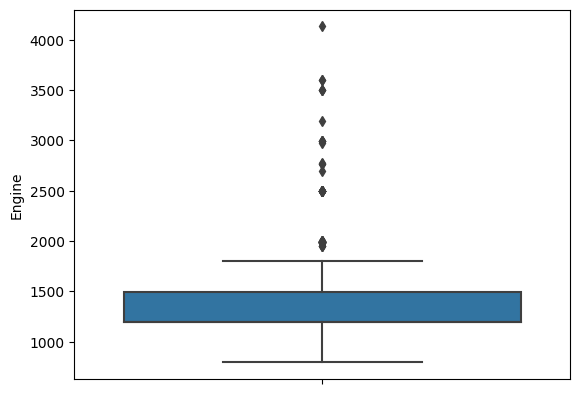

In [202]:
sns.boxplot(y = 'Engine', data = dfp)

As we can see there are many outliers present in dfp

In [203]:
dfp['Engine'].describe()

count    2191.000000
mean     1293.685532
std       330.671228
min       796.000000
25%      1196.000000
50%      1197.000000
75%      1497.000000
max      4134.000000
Name: Engine, dtype: float64

In [204]:
q1 = dfp['Engine'].describe()[4]
q3 = dfp['Engine'].describe()[6]
print(q1,q3)

iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(lf,uf)

1196.0 1497.0
744.5 1948.5


In [205]:
dfp = dfp[~((dfp['Engine'] < 744.5) | (dfp['Engine'] > 1948.5))]
dfp.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
10,10,maruti ciaz,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
11,11,honda city,Kolkata,2012,60000,Petrol,Automatic,First,16.80,1497.0,116.30,5.0,4.49
23,23,hyundai i20,Kolkata,2010,45807,Petrol,Manual,First,18.50,1197.0,80.00,5.0,1.87
24,24,volkswagen vento,Kolkata,2010,33000,Petrol,Automatic,First,14.40,1598.0,103.60,5.0,2.85


In [206]:
dfp.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              37
Engine               25
Power                71
Seats                26
Price                 0
dtype: int64

In [207]:
#fill the missing Engine values with average value of engine for petrol cars
dfp['Engine'] = dfp['Engine'].fillna(dfp['Engine'].mean())

<ipython-input-207-ef43ad0dd946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Engine'] = dfp['Engine'].fillna(dfp['Engine'].mean())


* Combine the dfd and dfp
* pd.concat((dfd,dfp))

In [208]:
df4 = pd.concat((dfd,dfp))
df4.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


In [209]:
df4.isnull().sum()

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               46
Engine                 0
Power                115
Seats                 35
Price                  0
dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Engine'>

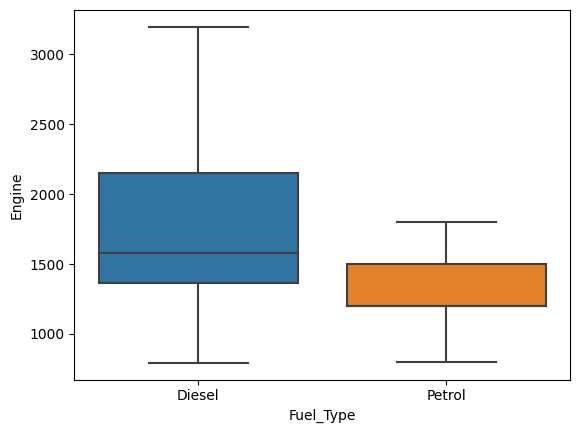

In [210]:
sns.boxplot(x = 'Fuel_Type', y = 'Engine', data = df4)

In [211]:
df4.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


In [212]:
df4.isnull().sum()

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               46
Engine                 0
Power                115
Seats                 35
Price                  0
dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Power'>

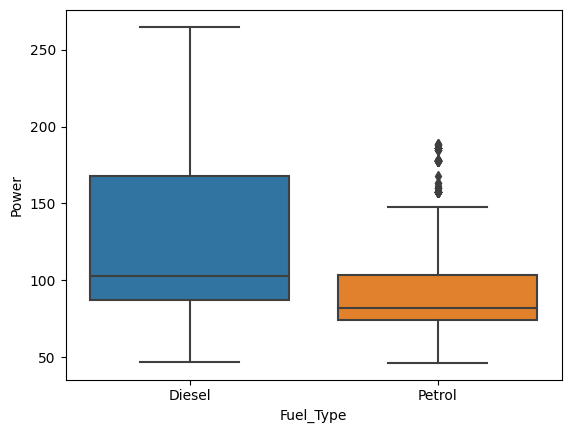

In [213]:
sns.boxplot(x = 'Fuel_Type' , y = 'Power' , data = df4)

In [214]:
#Seperate Diesel & Petrol cars
dfd = df4[df4['Fuel_Type'] == 'Diesel']
dfp = df4[df4['Fuel_Type'] == 'Petrol']

In [215]:
#Calculate Upper fence & lower fence of Power values for both type of cars using quartile values

q1 = dfp['Power'].describe()[4]
q3 = dfp['Power'].describe()[6]
print(q1,q3)

iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(lf,uf)

73.9 103.52
29.47000000000002 147.95


In [216]:
((dfp['Power'] < 29.47) | (dfp['Power'] > 148)).sum()/len(df4)

0.015148188803512623

In [217]:
#Filter the car samples for Petrol cars which are within lf & hf values to remove outliers

dfp = dfp[~((dfp['Power'] < 29.47) | (dfp['Power'] > 148))]
dfp.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
10,10,maruti ciaz,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
11,11,honda city,Kolkata,2012,60000,Petrol,Automatic,First,16.80,1497.0,116.30,5.0,4.49
23,23,hyundai i20,Kolkata,2010,45807,Petrol,Manual,First,18.50,1197.0,80.00,5.0,1.87
24,24,volkswagen vento,Kolkata,2010,33000,Petrol,Automatic,First,14.40,1598.0,103.60,5.0,2.85


In [219]:
#Fill the missing Power values in diesel & petrol cars using respective mean values of Power

dfd['Power'] = dfd['Power'].fillna(dfd['Power'].mean())
dfp['Power'] = dfp['Power'].fillna(dfp['Power'].mean())

<ipython-input-219-b058773ec73c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['Power'] = dfd['Power'].fillna(dfd['Power'].mean())


In [220]:
df5 = pd.concat((dfd,dfp) , axis='rows')
df5.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


<Axes: xlabel='Fuel_Type', ylabel='Power'>

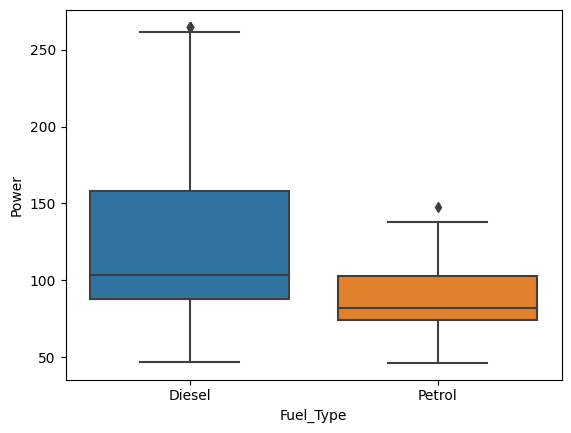

In [221]:
sns.boxplot(x = 'Fuel_Type' , y = 'Power' , data = df5)

In [222]:
df5.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              46
Engine                0
Power                 0
Seats                35
Price                 0
dtype: int64

**Fix missing values in seats**

In [223]:
df5.groupby('Name')['Seats'].max()

Name
audi a4                  5.0
audi a6                  5.0
audi q7                  7.0
bmw 3                    5.0
bmw 5                    5.0
bmw x1                   5.0
chevrolet beat           5.0
ford ecosport            5.0
ford endeavour           7.0
ford fiesta              5.0
ford figo                5.0
honda amaze              5.0
honda brio               5.0
honda city               5.0
honda civic              5.0
honda jazz               5.0
hyundai creta            5.0
hyundai eon              5.0
hyundai grand            5.0
hyundai i10              5.0
hyundai i20              5.0
hyundai santro           5.0
hyundai verna            5.0
hyundai xcent            5.0
land rover               7.0
mahindra scorpio         9.0
mahindra xuv500          7.0
maruti alto              5.0
maruti baleno            5.0
maruti celerio           5.0
maruti ciaz              5.0
maruti ertiga            7.0
maruti ritz              5.0
maruti swift             5.0
maruti sx